# Logistic regression to predict categories of pumpkin seeds
# Ordinal classification

In [2]:
# importing requred dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [3]:
# Loading dataset 
file_path = r"C:\Users\Ravichandran\OneDrive\Desktop\US-pumpkins.csv"
pumkin_data = pd.read_csv(file_path)
pumkin_data = pumkin_data.copy()


In [4]:
pumkin_data.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [5]:
pumkin_data.value_counts(normalize=True)

Series([], Name: proportion, dtype: float64)

In [6]:
pumkin_data.isnull().sum().to_dict()

{'City Name': 0,
 'Type': 1712,
 'Package': 0,
 'Variety': 5,
 'Sub Variety': 1461,
 'Grade': 1757,
 'Date': 0,
 'Low Price': 0,
 'High Price': 0,
 'Mostly Low': 103,
 'Mostly High': 103,
 'Origin': 3,
 'Origin District': 1626,
 'Item Size': 279,
 'Color': 616,
 'Environment': 1757,
 'Unit of Sale': 1595,
 'Quality': 1757,
 'Condition': 1757,
 'Appearance': 1757,
 'Storage': 1757,
 'Crop': 1757,
 'Repack': 0,
 'Trans Mode': 1757,
 'Unnamed: 24': 1757,
 'Unnamed: 25': 1654}

In [7]:
pumkin_data.drop([
 'Type',
 'Sub Variety',
 'Grade',
 'Date',
 'Low Price',
 'High Price',
 'Mostly Low',
 'Mostly High',
 'Origin District',
 'Environment',
 'Unit of Sale',
 'Quality',
 'Condition',
 'Appearance',
 'Storage',
 'Crop',
 'Repack',
 'Trans Mode',
 'Unnamed: 24',
 'Unnamed: 25'], axis=1 , inplace=True)


In [8]:
pumkin_data.dropna(subset=['City Name','Package','Variety', 'Origin','Item Size', 'Color'], axis=0 , inplace=True)

In [9]:
pumkin_data

,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE
...,...,...,...,...,...,...
1694,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1695,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1696,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1697,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE


In [10]:
pumkin_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City Name  991 non-null    object
 1   Package    991 non-null    object
 2   Variety    991 non-null    object
 3   Origin     991 non-null    object
 4   Item Size  991 non-null    object
 5   Color      991 non-null    object
dtypes: object(6)
memory usage: 54.2+ KB


# Visualization - categorical plot
## for each pumpkin category (orange or white)
### using seaborn catplot function

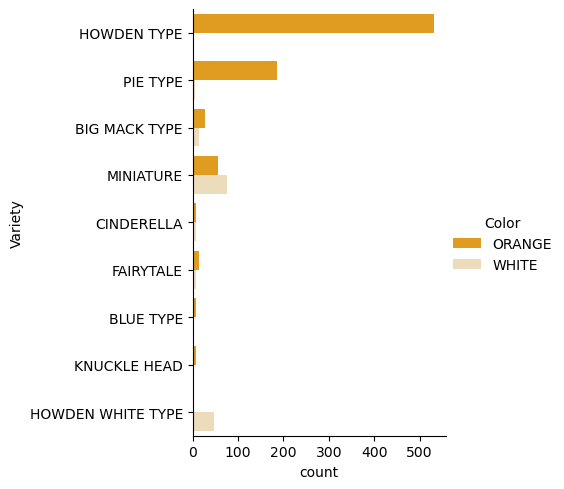

In [11]:
palette = {
    'ORANGE': 'orange',
     'WHITE': 'wheat',
}

sns.catplot(
    data=pumkin_data, y="Variety", hue="Color", kind="count",
    palette=palette,
)

# Data pre-processing: feature and label encoding
#### Ordinal encoder: it suits well for ordinal variables, which are categorical variables where their data follows a logical ordering, like the Item Size column in our dataset. It creates a mapping such that each category is represented by a number, which is the order of the category in the column.

In [12]:
item_size_categories = [['sml','med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
#Ordinal encoding is used for categorical variables where the categories have a meaningful order (ordinal data).
ordinal_features = ['Item Size']

ordinal_encoder = OrdinalEncoder(categories=item_size_categories)
#The categories parameter specifies the order in which the categories should be encoded.
#item_size_categories is a nested list: [['sml','med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']].

In [13]:
pumkin_data

,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE
...,...,...,...,...,...,...
1694,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1695,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1696,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1697,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE


In [14]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)  #sparse_output=False (makes data readebel)
# so here we are not compiling one hot encoder becouse we are do this in column transfromer

## ColumnTransformer is used to combine multiple encoders into a single step and apply them to the appropriate columns.

In [15]:
# ColumnTransformer ONLY works on features (X), NOT target (y)
from sklearn.compose import ColumnTransformer
    
ct = ColumnTransformer(transformers=[
        ('ord', ordinal_encoder, ordinal_features),
        ('cat', categorical_encoder, categorical_features)
        ])
    
ct.set_output(transform='pandas') # so set_out what it does is gives dataset in which formate output we want
encoded_features = ct.fit_transform(pumkin_data)
encoded_features.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
Label_encoder = LabelEncoder()
encoded_labels = Label_encoder.fit_transform(pumkin_data['Color'])

In [17]:
encoded_pumkin_data = encoded_features.assign(Color=encoded_labels) 
#  ColumnTransformer only handled the features (X), not the target (y) so thats why i am using this code

In [18]:
encoded_pumkin_data.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [19]:
encoded_pumkin_data['Color'] # taking encoded values

2       0
3       0
4       0
5       0
6       0
       ..
1694    1
1695    1
1696    1
1697    1
1698    1
Name: Color, Length: 991, dtype: int32

In [20]:
list(Label_encoder.inverse_transform([0,1])) # converts back to text farmate

['ORANGE', 'WHITE']

## to visualize the relationships between Item Size, Variety and Color in a categorical plot. To better plot the data we'll be using the encoded Item Size column and the unencoded Variety column.

C:\Users\Ravichandran\AppData\Local\Temp\ipykernel_23704\2608870670.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


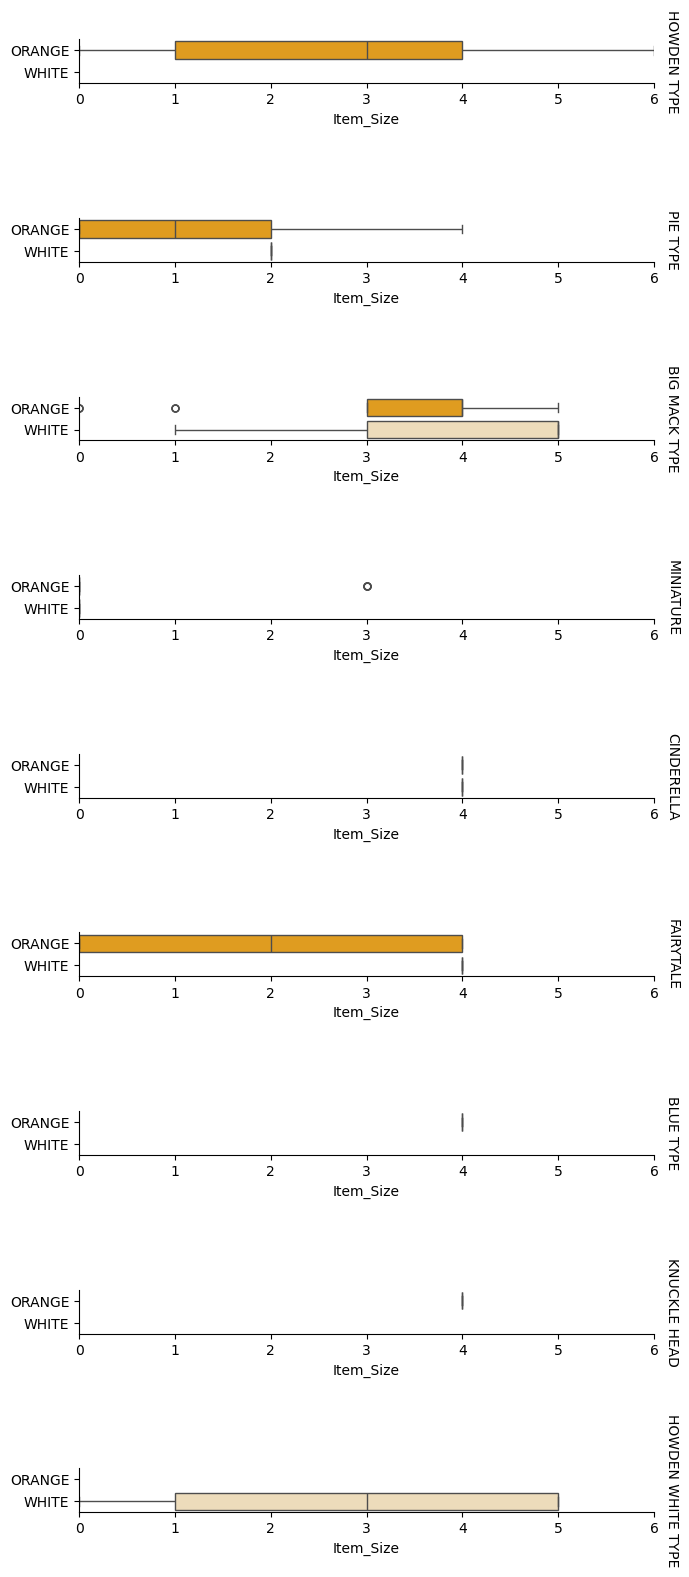

In [ ]:
# Creates a color dictionary
palette = {
    'ORANGE' : 'orange',
    'WHITE' : 'wheat',
}

# Takes the encoded/transformed values and puts them back
# encoded_pumpkins['ord__Item Size'] = the ordinal encoded numbers (like 0, 1, 2, 3)
# Replaces the original 'Item Size' column with these encoded numbers
# Now 'Item Size' has numerical values instead of text categories

pumkin_data['Item Size']= encoded_pumkin_data['ord__Item Size'] # for visualization purpose

# data=pumpkins = use this DataFrame
# x="Item Size" = Item Size on x-axis (now numerical values)
# y="Color" = Color on y-axis
# row='Variety' = separate plot for each variety (one row per variety)
# kind="box" = make box plots
# orient="h" = horizontal boxes
# sharex=False = each row can have different x-axis scales
# margin_titles=True = put variety names on the side
# height=1.8, aspect=4 = size of each subplot
# palette=palette = use the color dictionary from above    
                                      
g = sns.catplot(
    data=pumkin_data,
    x = "Item Size" , y='Color' , row='Variety' , 
    kind="box", orient="h" , 
    sharex=False , margin_titles=True,
    height=1.8 , aspect=4, palette=palette,
)

g.set(xlabel="Item_Size" , ylabel="").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")



#### Use a swarm plot
#### Since Color is a binary category (White or Not), it needs 'a specialized approach to visualization'. There are other ways to visualize the relationship of this category with other variables.

C:\Users\Ravichandran\AppData\Local\Temp\ipykernel_23704\1174727071.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Color", y='ord__Item Size', data=encoded_pumkin_data, palette=palette )
c:\Users\Ravichandran\anaconda3\conda-meta\ank ss\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Ravichandran\anaconda3\conda-meta\ank ss\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='ord__Item Size'>

c:\Users\Ravichandran\anaconda3\conda-meta\ank ss\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Ravichandran\anaconda3\conda-meta\ank ss\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


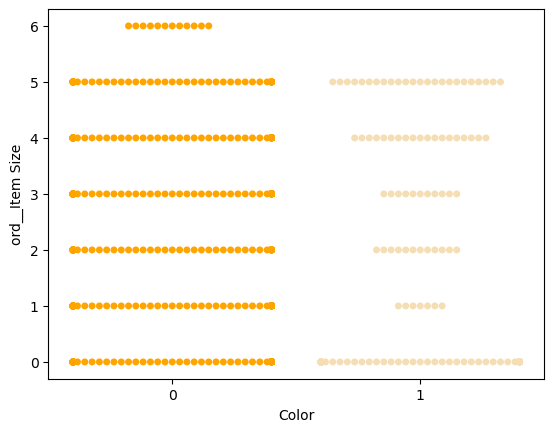

In [22]:
# swarn plot
palette ={
    '0' : "orange",
    '1' : "wheat"
}
sns.swarmplot(x="Color", y='ord__Item Size', data=encoded_pumkin_data, palette=palette )

In [23]:
print("Available columns:", encoded_pumkin_data.columns.tolist())

Available columns: ['ord__Item Size', 'cat__City Name_ATLANTA', 'cat__City Name_BALTIMORE', 'cat__City Name_BOSTON', 'cat__City Name_CHICAGO', 'cat__City Name_COLUMBIA', 'cat__City Name_DALLAS', 'cat__City Name_DETROIT', 'cat__City Name_LOS ANGELES', 'cat__City Name_MIAMI', 'cat__City Name_NEW YORK', 'cat__City Name_PHILADELPHIA', 'cat__City Name_SAN FRANCISCO', 'cat__City Name_ST. LOUIS', 'cat__Package_1 1/9 bushel cartons', 'cat__Package_1 1/9 bushel crates', 'cat__Package_1/2 bushel cartons', 'cat__Package_24 inch bins', 'cat__Package_36 inch bins', 'cat__Package_bins', 'cat__Package_bushel cartons', 'cat__Variety_BIG MACK TYPE', 'cat__Variety_BLUE TYPE', 'cat__Variety_CINDERELLA', 'cat__Variety_FAIRYTALE', 'cat__Variety_HOWDEN TYPE', 'cat__Variety_HOWDEN WHITE TYPE', 'cat__Variety_KNUCKLE HEAD', 'cat__Variety_MINIATURE', 'cat__Variety_PIE TYPE', 'cat__Origin_ALABAMA', 'cat__Origin_CALIFORNIA', 'cat__Origin_CANADA', 'cat__Origin_DELAWARE', 'cat__Origin_ILLINOIS', 'cat__Origin_MARYLA

In [24]:
encoded_pumkin_data

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1695,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1696,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1697,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Traing logistic model 

In [ ]:
# Spliting datasets into training and test datasets
X = encoded_pumkin_data[encoded_pumkin_data.columns.difference(['Color'])] # Get ALL columns except target 
y = encoded_pumkin_data['Color']

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=0)

In [ ]:
from sklearn.metrics import f1_score , classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train ,y_train)
predictions = model.predict(X_test)

print("classification report\n ",classification_report(y_test , predictions))

# Precision: Of all predictions for this class, how many were correct?
# Recall: Of all actual instances of this class, how many did we catch?
# F1-score: Balance between precision and recall
# Support: How many actual instances of each class

print("Predicted values : " , predictions)
print("Actual values : " , y_test)

print('F1_score : ' , f1_score(y_test,predictions))
#F1 = 2 × (Precision × Recall) / (Precision + Recall)

classification report
                precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predicted values :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
Actual values :  1056    0
1070    0
79      0
432     0
1151    0
       ..
346     1
1259    0
1019    0
1227    1
610     1
Name: Color, Length: 199, dtype: int32
F1_score :  0.7457627118644068


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

# PREDICTED
#               0      1
# ACTUAL    0  [TN]  [FP]    TN = True Negative (correctly predicted 0)
#           1  [FN]  [TP]    TP = True Positive (correctly predicted 1)
#                            FP = False Positive (wrongly predicted 1) 
#                            FN = False Negative (wrongly predicted 0)

array([[162,   4],
       [ 11,  22]], dtype=int64)

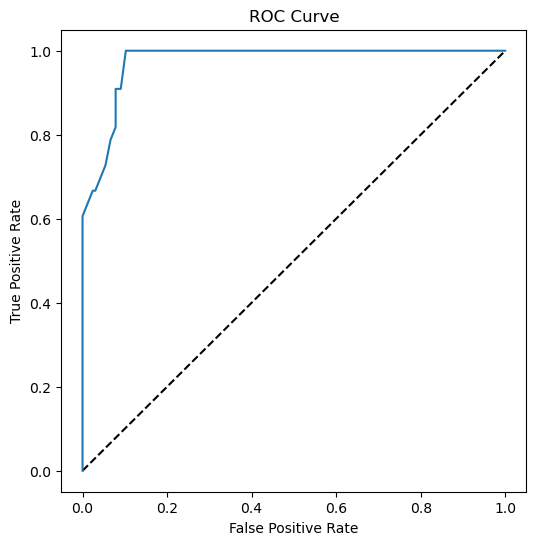

In [ ]:
# ROC = Receiver Operating Characteristic
# ROC Curve: A graph that shows how well your model separates classes
# ROC AUC: A single number (0 to 1) that summarizes the curve

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [35]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9749908725812341
